# Testing new AMM


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('../..')

from model import run
from model import plot_utils as pu
from model import processing

from model.amm.omnipool_amm import OmnipoolState
from model.amm.agents import Agent
from model.amm.trade_strategies import TradeStrategies
from model.amm.global_state import GlobalState

# same seed, same parameters = same simulation result
random.seed(42)

price_dict = {
    'HDX': 0.05,
    'USD': 1,
    'LRNA': 0.5,
    'R1': 2,
    'R2': 2/3
}

def lrna_price(asset: str):
    return price_dict['LRNA'] / price_dict[asset]

initial_state = GlobalState(
    pools={
        'omnipool': OmnipoolState(
            tokens={
                'HDX': {'liquidity': 1000000, 'LRNA_price': lrna_price('HDX')},
                'USD': {'liquidity': 1000000, 'LRNA_price': lrna_price('USD')},
                'R1': {'liquidity': 1000000, 'LRNA_price': lrna_price('R1')},
                'R2': {'liquidity': 3000000, 'LRNA_price': lrna_price('R2')},
            },
            lrna_fee=0,
            asset_fee=0
        )
    },
    agents = {
        'Trader': Agent(
            holdings = {'R1': 1000000, 'R2': 1000000},
            trade_strategy=TradeStrategies.random_swaps(pool='omnipool', amount={'R1': 333, 'R2': 1000}, randomize_amount=True)
        ), 
        'LP1': Agent(
            holdings = {'R1': 500000},
            trade_strategy = TradeStrategies.invest_all(pool='omnipool')
        ), 
        'LP2': Agent(
            holdings = {'R2': 1500000},
            trade_strategy = TradeStrategies.invest_all(pool='omnipool')
        )
    },
    external_market=price_dict
)

events = run.run(initial_state, time_steps = 5000)

Starting simulation...
Execution time: 1.23 seconds.


In [2]:
events = processing.postprocessing(events, optional_params=['deposit_val', 'withdraw_val', 'impermanent_loss', 'pool_val'])


processing {'impermanent_loss', 'pool_val', 'deposit_val', 'withdraw_val'}


In [3]:
%matplotlib inline

## Analysis

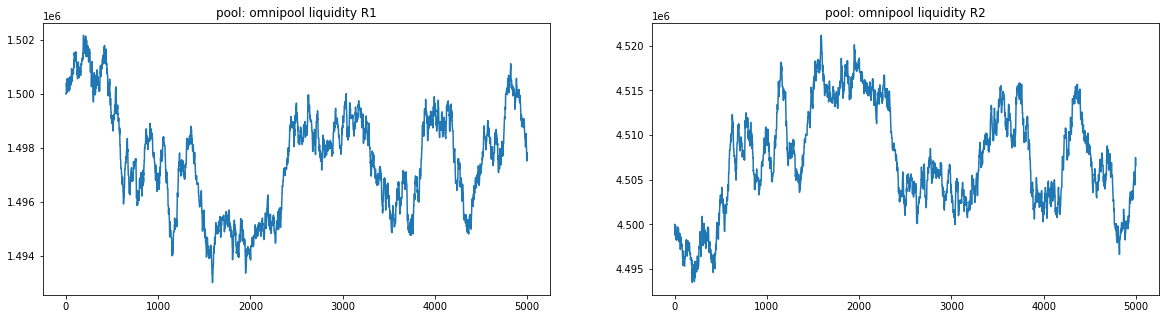

In [4]:
pu.plot(events, pool='omnipool', prop='liquidity', key=['R1', 'R2'])

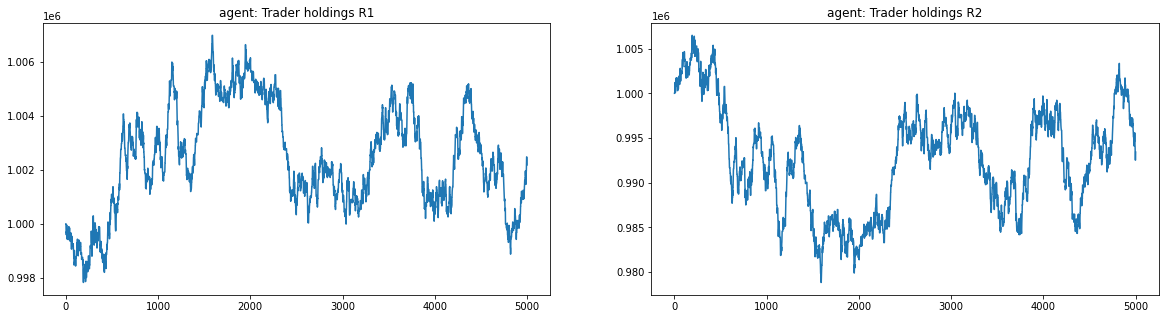

In [5]:
pu.plot(events, agent='Trader', prop='holdings')

## Conclusion



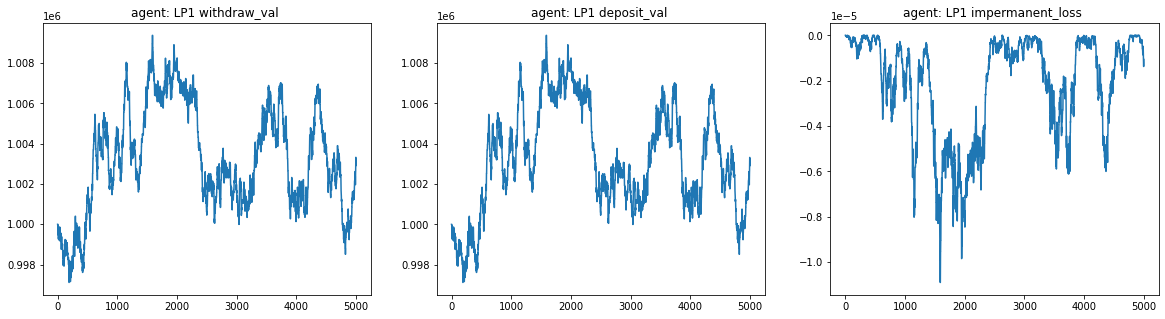

In [6]:
pu.plot(events, agent='LP1', prop = ['withdraw_val', 'deposit_val', 'impermanent_loss'])